In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")

In [22]:
transitions_all = pd.read_csv("./transitions.csv")
transitions_all.describe()


,episode,t,factory_stock,warehouse_stock_0,warehouse_stock_1,production_level,shippings_to_warehouses_0,shippings_to_warehouses_1,timestep_reward,total_reward
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.500000,24.500000,6.798343,3.960432,3.623236,3.694346,1.736449,1.813616,93.009118,1750.910420
std,28.868957,14.432313,2.950295,2.370935,2.334409,3.944003,3.300746,3.305654,243.544802,1740.084169
min,0.000000,0.000000,-7.942995,-2.962204,-2.299354,0.000000,0.000000,0.000000,-979.524192,-1293.229362
25%,24.750000,12.000000,7.580882,2.047245,1.675162,0.000000,0.000000,0.000000,-92.777122,213.753362
50%,49.500000,24.500000,7.686296,4.047245,3.675162,0.000000,0.000000,0.000000,138.049505,1686.402102
75%,74.250000,37.000000,7.787153,6.047245,5.538227,7.904035,0.000000,0.000000,260.512135,3241.748618
max,99.000000,49.000000,7.959021,8.113389,8.213389,7.904035,8.009449,7.837581,663.092100,5972.578355


In [23]:
episodes = np.array(transitions_all["episode"].unique())
episode_num = np.random.randint(episodes.shape[0])
transitions = transitions_all[transitions_all["episode"] == episode_num]

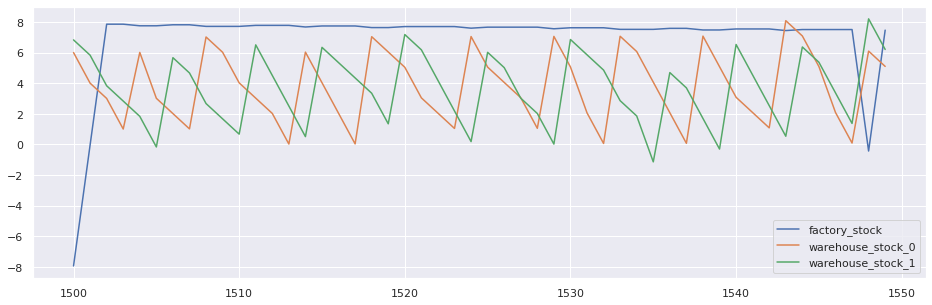

In [24]:
plt.figure(figsize=(16,5))
plt.plot(transitions["factory_stock"])
plt.plot(transitions["warehouse_stock_0"])
plt.plot(transitions["warehouse_stock_1"])

plt.legend(["factory_stock", "warehouse_stock_0", "warehouse_stock_1"])


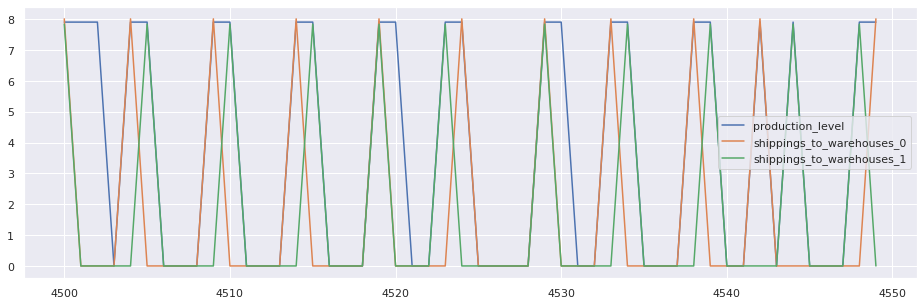

In [18]:
plt.figure(figsize=(16, 5))
plt.plot(transitions["production_level"])
plt.plot(transitions["shippings_to_warehouses_0"])
plt.plot(transitions["shippings_to_warehouses_1"])

plt.legend(["production_level", "shippings_to_warehouses_0",
           "shippings_to_warehouses_1"])


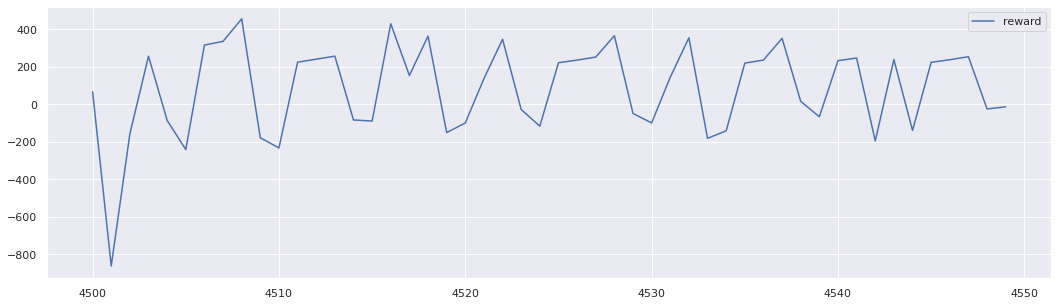

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(transitions["timestep_reward"])
plt.legend(["reward"])


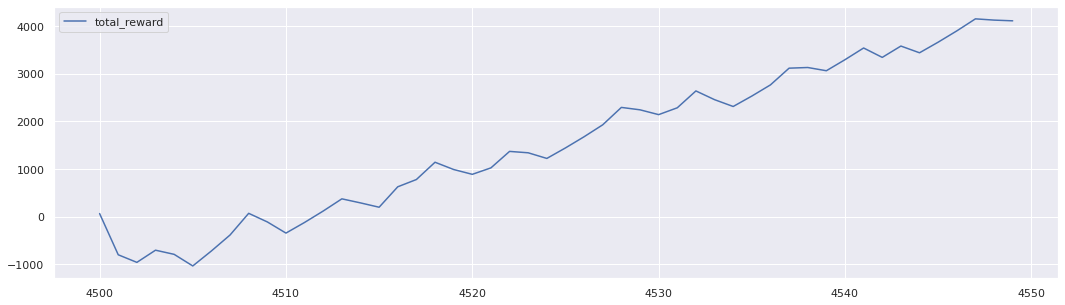

In [20]:
plt.figure(figsize=(18, 5))
plt.plot(transitions["total_reward"])
plt.legend(["total_reward"])